Часть проекта, выполненная инструментами fastai.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from fastai.vision.all import *

In [3]:
path = '/content/drive/MyDrive/cv/data'

In [4]:
files = get_image_files(path)
len(files)

7816

In [5]:
files

(#7816) [Path('/content/drive/MyDrive/cv/data/disco/1a2f3054-da06-43c7-a406-bbafa7be934e.png'),Path('/content/drive/MyDrive/cv/data/disco/0e2daa83-849f-3012-8eab-0ef2cc27cdec.png'),Path('/content/drive/MyDrive/cv/data/disco/d4ed8ff8-20f0-4245-bb7a-502cdedd002b.png'),Path('/content/drive/MyDrive/cv/data/disco/e9bf6589-49ae-3c95-a043-6d4d0bb2f254.png'),Path('/content/drive/MyDrive/cv/data/disco/99e610b7-40e9-320b-addb-062d08fe866a.png'),Path('/content/drive/MyDrive/cv/data/disco/503073f1-3278-4132-b528-6c6dc4577696.png'),Path('/content/drive/MyDrive/cv/data/disco/cf629b5f-3b3f-4710-a531-c7c338e3c991.png'),Path('/content/drive/MyDrive/cv/data/disco/2fb6bd83-cad5-4276-86c9-e233728f8432.png'),Path('/content/drive/MyDrive/cv/data/disco/a832d89d-4474-463d-a3cc-ed4a2e410c8f.png'),Path('/content/drive/MyDrive/cv/data/disco/5881bd81-b8e0-4fa4-b55a-71849b51d5d2.png')...]

In [6]:
label_function = lambda f: str(f).split("/")[-2]

In [7]:
images = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=label_function,
                   item_tfms=Resize(224, method=ResizeMethod.Pad))

In [8]:
loader = images.dataloaders(path)

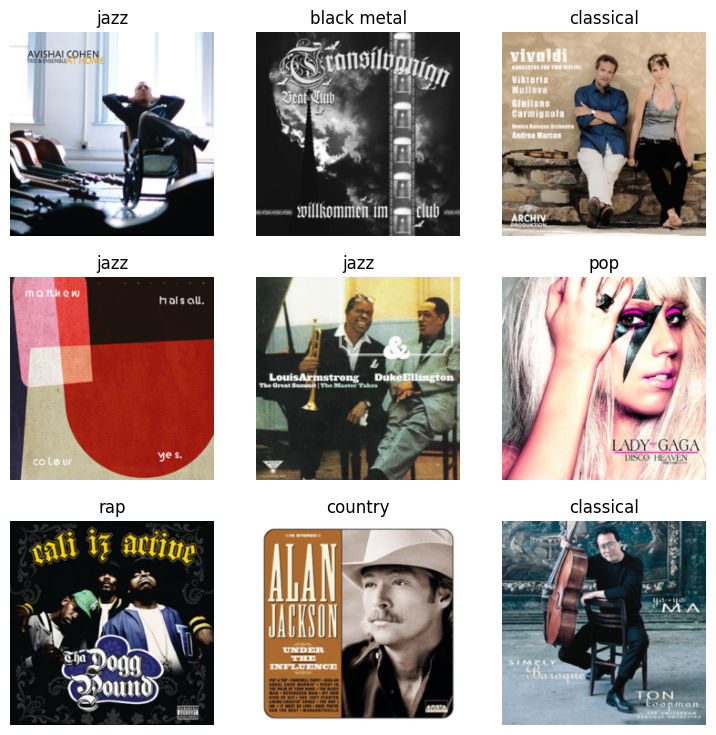

In [9]:
loader.show_batch(max_n=9)

In [10]:
#learn.lr_find()

In [11]:
learn = vision_learner(loader, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 125MB/s]


In [12]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.259654,1.544248,0.532310,46:03


epoch,train_loss,valid_loss,accuracy,time
0,1.448121,1.304981,0.593090,1:07:02
1,1.000643,1.340094,0.596289,1:09:23
2,0.486459,1.361251,0.619322,1:06:52
3,0.188400,1.390861,0.632758,1:07:21
4,0.089763,1.380037,0.631478,1:08:03


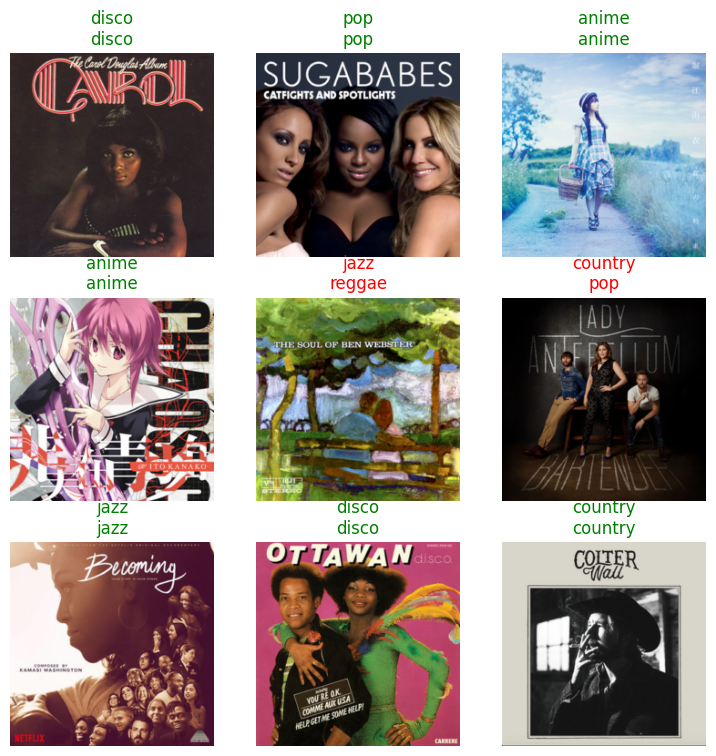

In [13]:
learn.show_results()

In [22]:
learn.predict('/content/drive/MyDrive/cv/test_test/dolly_parton.jpeg')

('disco',
 tensor(4),
 tensor([5.4728e-05, 2.1202e-03, 2.3932e-04, 6.1276e-02, 9.2576e-01, 1.2719e-04,
         5.5247e-04, 8.6946e-03, 1.2127e-04, 1.0535e-03]))

In [23]:
learn.predict('/content/drive/MyDrive/cv/test_test/janis_joplin.jpeg')

('country',
 tensor(3),
 tensor([1.7049e-01, 9.4262e-02, 2.1740e-04, 6.2672e-01, 1.5449e-02, 5.9127e-04,
         1.1882e-02, 6.9977e-03, 5.8222e-03, 6.7569e-02]))

In [24]:
learn.predict('/content/drive/MyDrive/cv/test_test/oxxxymiron.jpeg')

('classical',
 tensor(2),
 tensor([1.5665e-03, 2.5548e-02, 9.2243e-01, 2.1559e-04, 4.0470e-02, 3.2322e-04,
         1.5652e-03, 5.5182e-04, 3.1070e-04, 7.0206e-03]))

In [21]:
learn.predict('/content/drive/MyDrive/cv/test_test/slipknot.jpeg')

('reggae',
 tensor(9),
 tensor([2.5032e-04, 3.6803e-01, 4.3475e-03, 1.1260e-03, 2.5194e-03, 1.0597e-03,
         5.1337e-02, 1.1905e-03, 1.8404e-01, 3.8609e-01]))

In [25]:
learn.predict('/content/drive/MyDrive/cv/test_test/taylor_swift.jpeg')

('country',
 tensor(3),
 tensor([4.4822e-03, 1.7583e-05, 7.0730e-05, 8.8923e-01, 5.3740e-04, 7.6437e-04,
         5.0567e-05, 1.0470e-01, 7.5654e-05, 6.9986e-05]))

In [26]:
learn.predict('/content/drive/MyDrive/cv/test_test/south_park.jpeg')

('pop',
 tensor(7),
 tensor([6.9703e-02, 2.1853e-04, 5.7270e-04, 9.0351e-04, 3.2580e-02, 3.5394e-01,
         4.8649e-03, 5.0040e-01, 2.3574e-02, 1.3237e-02]))